## Shang_Danqin_InClass_Salary

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Import data

In [7]:
os.chdir('C:\\Users\shang\Desktop\Python\ClassLab')
data = pd.read_csv("Salary_Data.csv")

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


### Check out the data with plots

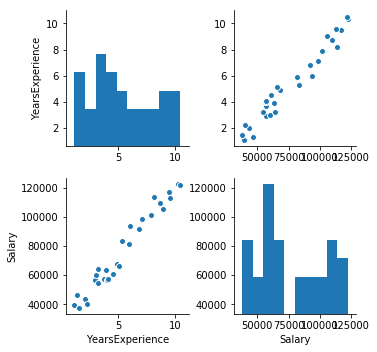

In [13]:
sns.pairplot(data)

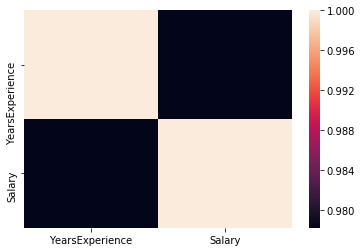

In [16]:
sns.heatmap(data.corr())

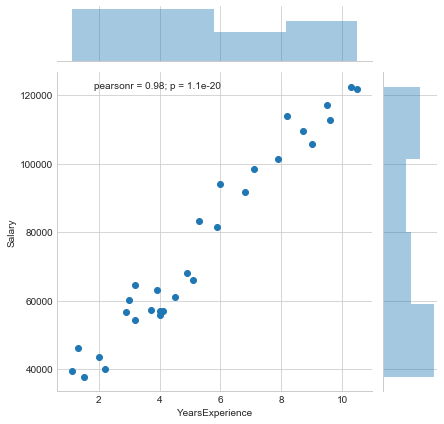

In [23]:
sns.set_style('whitegrid')
sns.jointplot(x='YearsExperience', y='Salary', data=data)

From plots above we can see that this data set has clearly linear relationship.
Let's create a linear model plot

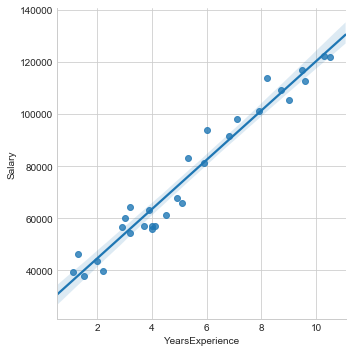

In [24]:
sns.lmplot(x='YearsExperience', y='Salary', data=data)

### Training a linear regression model

In [32]:
x = data['YearsExperience']
X = x[:, np.newaxis]
y = data['Salary']

Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

Train the model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(lm.intercept_)

27261.2585526


In [48]:
print(lm.coef_)

[ 8826.69541614]


Interpreting the coefficient:
- 1 year increase of experience is associated with $8826.695 increase in salary.

Predicting test data

In [49]:
prediction = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

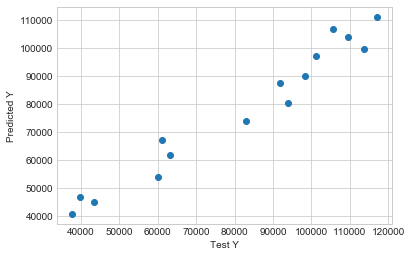

In [53]:
plt.scatter(y_test, prediction)
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')

Evaluating the model

In [54]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 6076.97890634
MSE: 51792789.2728
RMSE: 7196.7207305


Check residuals. It is approximately normally distributed even though the data size is too small

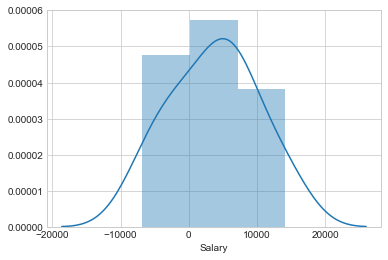

In [58]:
sns.distplot((y_test-prediction))

### Conclusion
- In this simple linear regression model, we can see that years of experience and salary are linear related.
- For every 1 year increase in experience, the salary will increase as well.
- Whether Years of Experience has only simple linear relationship with salary need future exploration. We may need to add more variables that are influnce salary to explore futhur relationships.